## Imports

In [1]:
import sys
sys.path.append('../001_modules')

from trainning_tools import *
%matplotlib inline

## Trainning 1

In [2]:
trn_dl, val_dl = get_data()

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
epochs = 10

model, loss_fn, optimizer = get_model()

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                factor=0.5,patience=5,
                                                threshold = 0.001,
                                                verbose=True,
                                                min_lr = 1e-5,
                                                threshold_mode = 'abs')

using: cuda


In [3]:
%%time
for epoch in tqdm(range(epochs)):

    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, \
        loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
        train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
        scheduler.step(validation_loss)
    val_epoch_accuracy = np.mean(val_is_correct)
        
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [06:02<00:00, 36.24s/it]

CPU times: total: 6min 12s
Wall time: 6min 2s


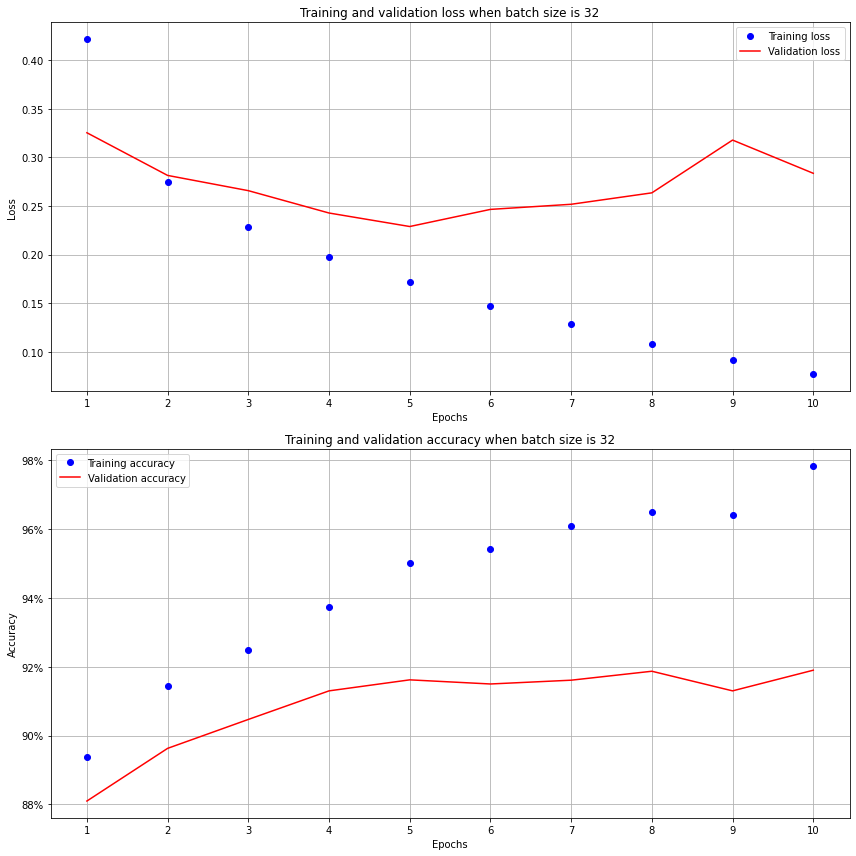

In [4]:
epochs = np.arange(epochs)+1
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss \
when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', \
label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', \
label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy \
when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.tight_layout()

## Trainning 2

In [5]:
trn_dl, val_dl = get_data(512)

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
epochs = 30

model, loss_fn, optimizer = get_model()

using: cuda


In [6]:
%%time
for epoch in tqdm(range(epochs)):
    
    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, \
        loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
        train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
        scheduler.step(validation_loss)
    val_epoch_accuracy = np.mean(val_is_correct)
        
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

  3%|██▊                                                                                | 1/30 [00:19<09:28, 19.60s/it]

Epoch 00011: reducing learning rate of group 0 to 5.0000e-04.


 23%|███████████████████▎                                                               | 7/30 [02:21<07:44, 20.21s/it]

Epoch 00017: reducing learning rate of group 0 to 2.5000e-04.


 43%|███████████████████████████████████▌                                              | 13/30 [04:17<05:31, 19.52s/it]

Epoch 00023: reducing learning rate of group 0 to 1.2500e-04.


 63%|███████████████████████████████████████████████████▉                              | 19/30 [06:13<03:32, 19.27s/it]

Epoch 00029: reducing learning rate of group 0 to 6.2500e-05.


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [08:08<01:36, 19.23s/it]

Epoch 00035: reducing learning rate of group 0 to 3.1250e-05.


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [09:42<00:00, 19.42s/it]

CPU times: total: 10min 28s
Wall time: 9min 42s


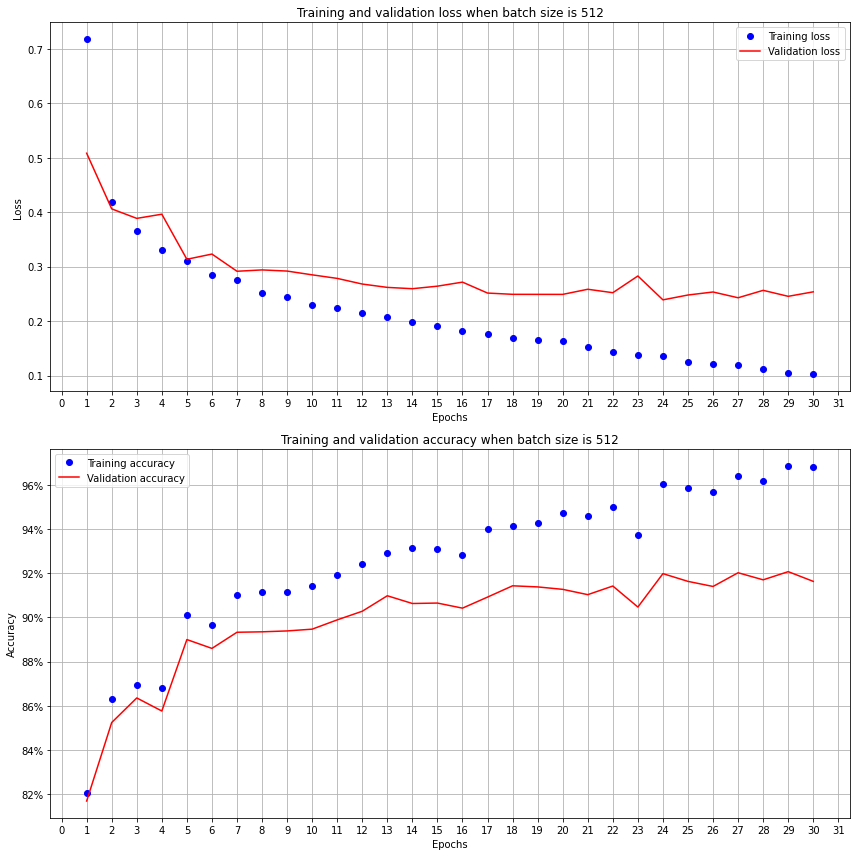

In [7]:
epochs = np.arange(epochs)+1
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss \
when batch size is 512')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', \
label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', \
label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy \
when batch size is 512')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.tight_layout()

## Trainning 3

In [8]:
trn_dl, val_dl = get_data(512)

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
epochs = 50

model, loss_fn, optimizer = get_model()

using: cuda


In [9]:
%%time
for epoch in tqdm(range(epochs)):

    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, \
        loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
        train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
        scheduler.step(validation_loss)
    val_epoch_accuracy = np.mean(val_is_correct)
        
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

  2%|█▋                                                                                 | 1/50 [00:19<16:05, 19.71s/it]

Epoch 00041: reducing learning rate of group 0 to 1.5625e-05.


 14%|███████████▌                                                                       | 7/50 [02:15<13:50, 19.30s/it]

Epoch 00047: reducing learning rate of group 0 to 1.0000e-05.


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [16:02<00:00, 19.26s/it]

CPU times: total: 17min 20s
Wall time: 16min 2s


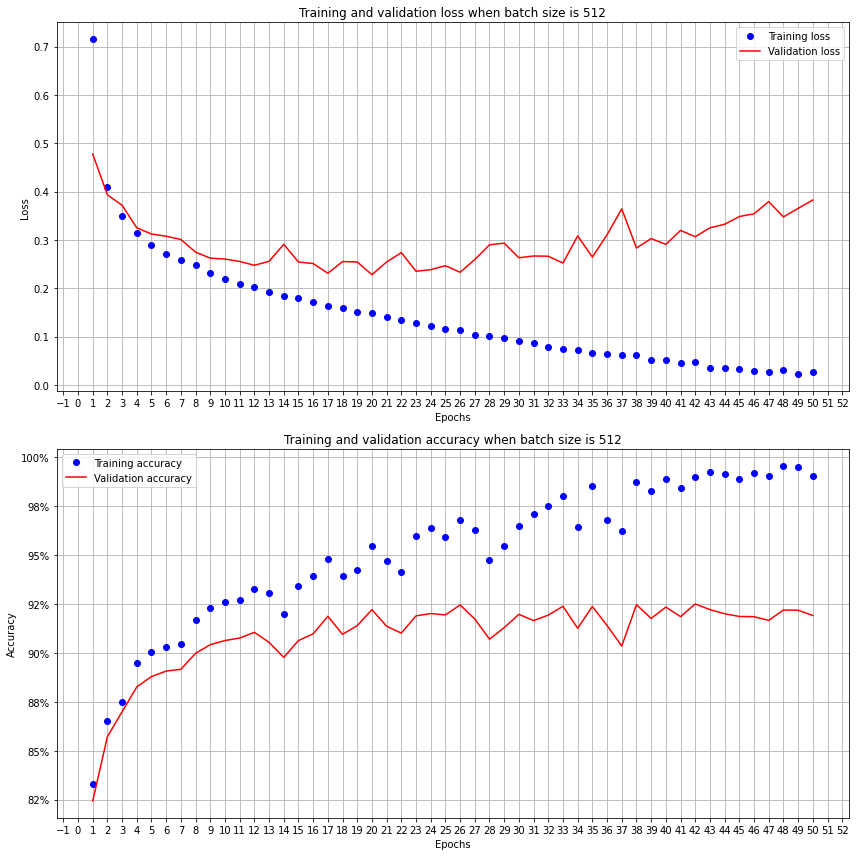

In [10]:
epochs = np.arange(epochs)+1
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss \
when batch size is 512')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', \
label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', \
label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy \
when batch size is 512')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.tight_layout()

## Trainning 4

In [11]:
trn_dl, val_dl = get_data(512)

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
epochs = 100

model, loss_fn, optimizer = get_model('sgd')

using: cuda


In [12]:
%%time
for epoch in tqdm(range(epochs)):

    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, \
        loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
        train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
        scheduler.step(validation_loss)
    val_epoch_accuracy = np.mean(val_is_correct)
        
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [32:06<00:00, 19.27s/it]

CPU times: total: 34min 44s
Wall time: 32min 6s


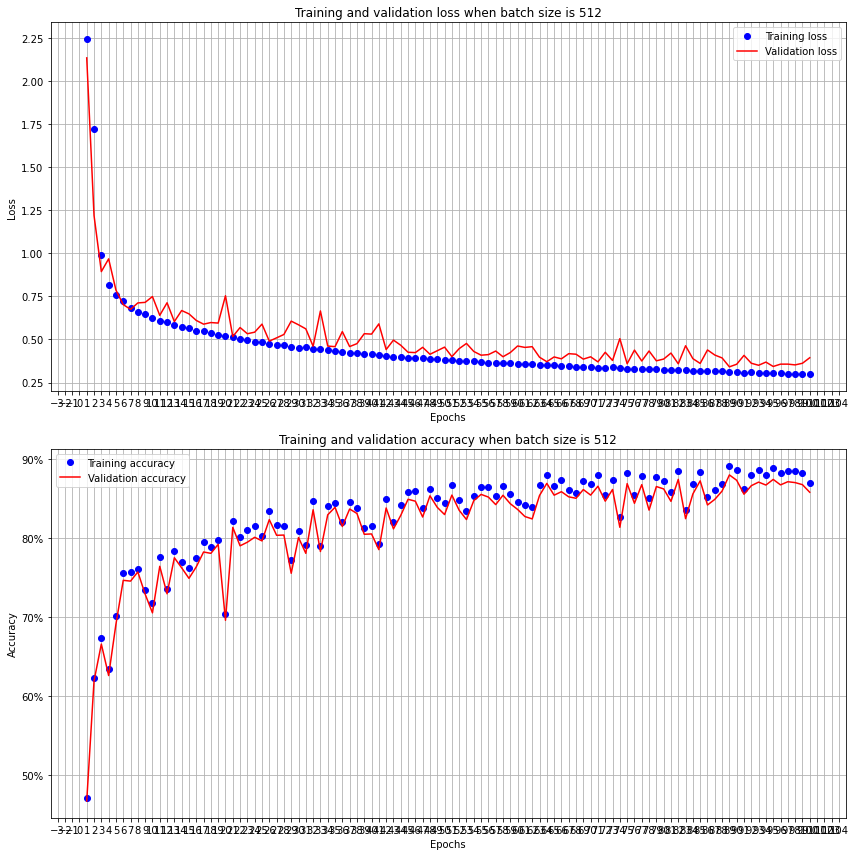

In [13]:
epochs = np.arange(epochs)+1
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss \
when batch size is 512')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', \
label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', \
label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy \
when batch size is 512')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.tight_layout()

In [14]:
torch.save(model.state_dict(), "../02_models/mohamad_model.pth")

## Trainning 5

In [15]:
trn_dl, val_dl = get_data(64)

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
epochs = 30

model, loss_fn, optimizer = get_model('sgd')

using: cuda


In [16]:
%%time
for epoch in tqdm(range(epochs)):

    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, \
        loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
        train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model, loss_fn)
        scheduler.step(validation_loss)
    val_epoch_accuracy = np.mean(val_is_correct)
        
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [12:49<00:00, 25.66s/it]

CPU times: total: 13min 31s
Wall time: 12min 49s


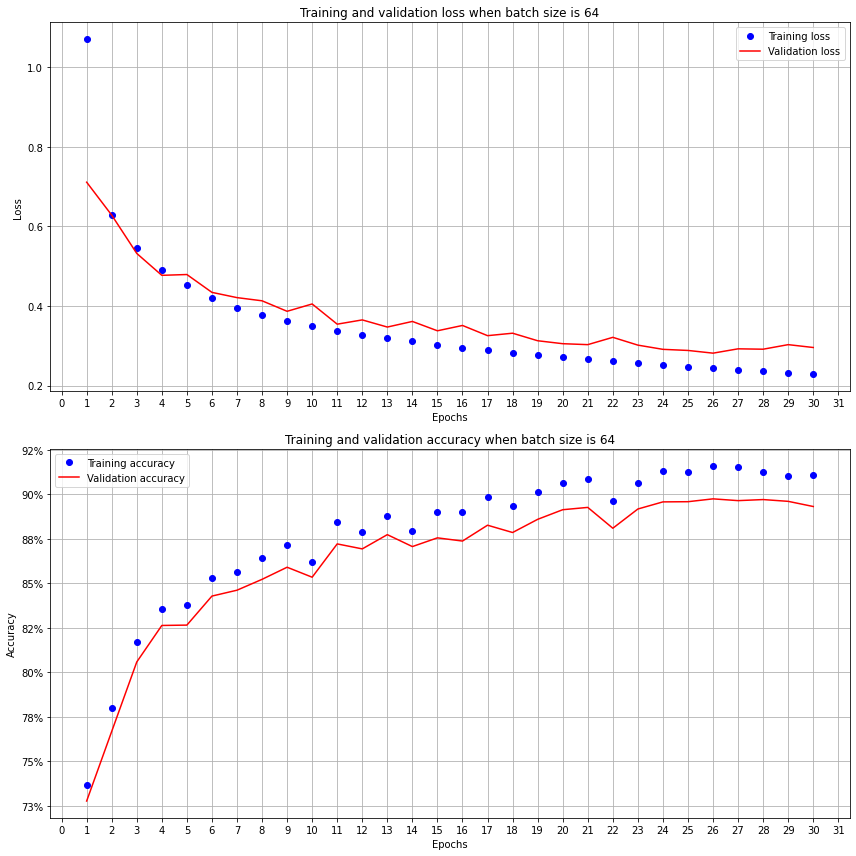

In [17]:
epochs = np.arange(epochs)+1
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss \
when batch size is 64')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', \
label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', \
label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy \
when batch size is 64')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.tight_layout()

In [18]:
# torch.save(model.state_dict(), "../02_models/mohamad_model.pth")